<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/47_radar_vegetation_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 14.4 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pooch
import rasterio as rio

In [ ]:
s1_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/raster/oromocto_jun2021_composite_s1_vv_vh.tif',
    known_hash='035faf46d56e26a39ae22340a98c1440ce509b7ef136226213fba9748a896ece'
)

In [ ]:
with rio.open(s1_file) as src:
    vv_db, vh_db = src.read()
    vv = 10 ** (vv_db / 10)
    vh = 10 ** (vh_db / 10)
    rvi = np.sqrt(vv / (vv + vh)) * (4 * vh / (vv + vh))

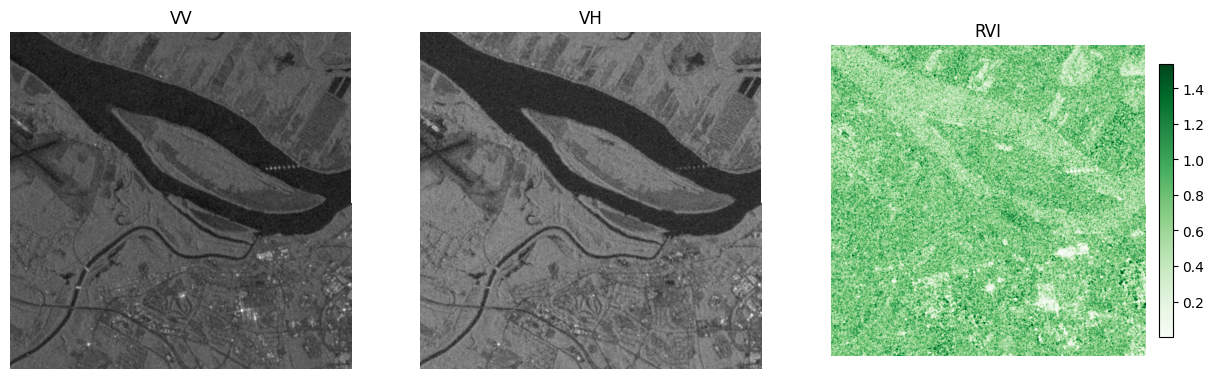

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(vv_db, cmap='gray')
axs[0].set_axis_off()
axs[0].set_title('VV')

axs[1].imshow(vh_db, cmap='gray')
axs[1].set_axis_off()
axs[1].set_title('VH')

im = axs[2].imshow(rvi, cmap='Greens')
axs[2].set_axis_off()
axs[2].set_title('RVI')
plt.colorbar(im, fraction=0.04, pad=0.04);